Importing Relevant Libraries

In [26]:
# import relevant libraries
import pandas as pd
import numpy as np
from numpy import average
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Columns with their descriptions
**Country**
Country

**Year**
Year

**Status**
Developed or Developing status

**Life expectancy**
Life Expectancy in age

**Adult Mortality**
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**infant deaths**
Number of Infant Deaths per 1000 population

**Alcohol**
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**percentage expenditure**
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

**Hepatitis B**
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles**
Measles - number of reported cases per 1000 population

**BMI**
Average Body Mass Index of entire population

**under-five deaths**
Number of under-five deaths per 1000 population

**Polio**
Polio (Pol3) immunization coverage among 1-year-olds (%)

**Total expenditure**
General government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria**
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

**HIV/AIDS**
Deaths per 1 000 live births HIV/AIDS (0-4 years)

**GDP**
Gross Domestic Product per capita (in USD)

**Population**
Population of the country

**thinness 1-19 years**
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

**thinness 5-9 years**
Prevalence of thinness among children for Age 5 to 9(%)

**Income composition of resources**
Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

**Schooling**
Number of years of Schooling(years)

### Import data from Life Expectancy.csv
Loading the Data Set and Reviewing the Data.


In [27]:
led = pd.read_csv("led.csv")
led

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [28]:
#Show dataframe information
led.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [29]:
#checking number of rows and columns in the dataset
led.shape

(2938, 22)

In [30]:
#inspecting the first 10 rows of the data set
led.head(10)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [31]:
#inspecting the last 10 rows of the data set
led.tail(10)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [32]:
#review the statistical summary of the data set
led.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [33]:
#view the columns of the data set
led.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

Reviewing the Missing values in the dataset

Findings.
There are 14 columns that have missing values

In [34]:
#check missing values in the whole data in DataFrame
#display sum of missing values in each column
print(led.isna().sum())

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64


Data Cleaning of Life Expectancy Data Set
The section section seeks to handle missing values in the dataset for clean data to perform statistical analysis

In [35]:
#drop rows in the entire data that have missing values
# Assuming df is your DataFrame
led = led.dropna()
led



,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [36]:
#check dataset information
led.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1649 non-null   object 
 1   Year                          1649 non-null   int64  
 2   Status                        1649 non-null   object 
 3   Lifeexpectancy                1649 non-null   float64
 4   AdultMortality                1649 non-null   float64
 5   infantdeaths                  1649 non-null   int64  
 6   Alcohol                       1649 non-null   float64
 7   percentageexpenditure         1649 non-null   float64
 8   HepatitisB                    1649 non-null   float64
 9   Measles                       1649 non-null   int64  
 10  BMI                           1649 non-null   float64
 11  under-fivedeaths              1649 non-null   int64  
 12  Polio                         1649 non-null   float64
 13  Totalexp

The Analysis of the Data is focused on Kenya to assist  Axis Investment and Consultancy seek to understanding the Country Economic health and it underlying factors this will guide to know the Kenya Economic Health

In [37]:
#selection of Country data
kenya_data = led[led['Country'] == 'Kenya']
kenya_data

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
1363,Kenya,2014,Developing,62.9,255.0,56,0.01,170.962662,92.0,354,...,93.0,5.72,92.0,2.9,1335.645800,462425.0,7.8,7.7,0.546,11.1
1364,Kenya,2013,Developing,62.6,258.0,58,1.84,165.930498,93.0,190,...,94.0,5.57,87.0,3.0,1229.114798,44826849.0,7.9,7.7,0.541,11.1
1365,Kenya,2012,Developing,62.1,263.0,59,1.81,154.226970,94.0,0,...,94.0,5.49,94.0,3.0,1155.258200,43646629.0,8.0,7.8,0.536,11.1
1366,Kenya,2011,Developing,61.2,278.0,60,1.80,109.705184,96.0,2395,...,97.0,5.23,96.0,3.4,987.445397,42486839.0,8.1,7.9,0.530,11.1
1367,Kenya,2010,Developing,63.0,294.0,61,1.73,56.589842,9.0,95,...,9.0,3.97,9.0,4.3,967.347730,4135152.0,8.2,8.0,0.523,11.1
1368,Kenya,2009,Developing,59.1,317.0,62,1.86,7.146851,88.0,1218,...,89.0,4.17,88.0,5.0,92.816252,423724.0,8.2,8.1,0.514,10.7
1369,Kenya,2008,Developing,57.9,339.0,64,1.71,60.515351,88.0,1282,...,88.0,3.90,88.0,6.4,916.899251,39148416.0,8.3,8.2,0.506,10.4
1370,Kenya,2007,Developing,56.8,356.0,66,1.97,59.833614,81.0,1516,...,76.0,4.80,81.0,9.1,839.181117,388599.0,8.4,8.3,0.494,10.1
1371,Kenya,2006,Developing,55.3,388.0,68,1.76,52.603854,8.0,1847,...,77.0,4.24,8.0,10.3,697.663850,37525.0,8.5,8.4,0.483,9.7
1372,Kenya,2005,Developing,54.1,412.0,70,1.82,39.556775,76.0,153,...,7.0,4.36,76.0,11.6,519.799935,3648288.0,8.6,8.5,0.474,9.6


Understanding of how Education metrics (schooling) affects the GDP of Kenya. It is seeks to find out whether there is any correlation between the Schooling and Kenya Economomy GDP

In [38]:
#correlation between gdp and schooling
gdp_schooling_correl = kenya_data[['GDP','Schooling']].corr().loc['GDP','Schooling']
gdp_schooling_correl

0.6801866416332532

Linear Regression Model to show relationship between GDP and Schooling to understand whether schooling contributes to growth of Kenya GDP



Mean Squared Error: 55739.70994911076


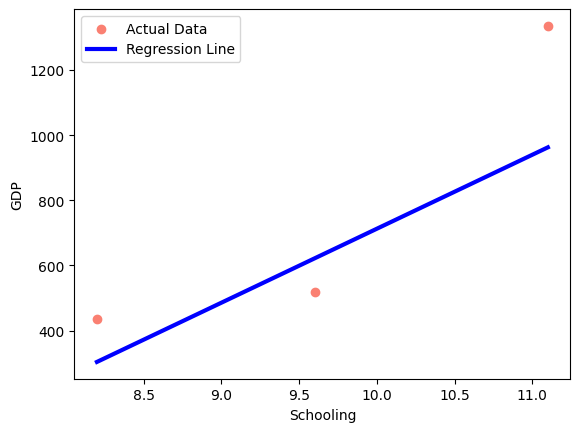

In [39]:
#linear regression to model relationship between GDP and Schooling
X = kenya_data[['Schooling']]
y = kenya_data['GDP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression line
plt.scatter(X_test, y_test, color='salmon', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Schooling')
plt.ylabel('GDP')
plt.legend()
plt.show()


In [40]:
#correlation between gdp and Polio
gdp_schooling_correl = kenya_data[['GDP','Polio']].corr().loc['GDP','Polio']
gdp_schooling_correl

0.1854804629862049

In [41]:
#correlation between gdp and Measles
gdp_schooling_correl = kenya_data[['GDP','Measles']].corr().loc['GDP','Measles']
gdp_schooling_correl

-0.057688256993720266

In [42]:
#correlation between gdp and Hiv/ Aids
gdp_schooling_correl = kenya_data[['GDP','HIV/AIDS']].corr().loc['GDP','HIV/AIDS']
gdp_schooling_correl

-0.6924852408411154

In [43]:
#correlation between gdp and income composition
gdp_schooling_correl = kenya_data[['GDP','Incomecompositionofresources']].corr().loc['GDP','Incomecompositionofresources']
gdp_schooling_correl


0.7524362285301051

### Variable Idetification

In this data understanding the it seeks to assist investors understand the factors that influence Kenya GDP. In the understanding of social-economic factors, and in that view seeks to look at the education metrics of Kenya in relationship to GDP growth


In [44]:
#correlation analysis between Schooling and GDP 

In [23]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.scatter((led.Country), led.LifeExpectancy)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Country against Life Expectancy')

AttributeError: 'DataFrame' object has no attribute 'LifeExpectancy'

<Figure size 1500x1000 with 0 Axes>

### Removing null values and replacing with mean values

In [ ]:
impute=SimpleImputer(missing_values=np.NaN,strategy="mean")
impute.fit_transform(led)

In [ ]:
led.columns

In [ ]:
led.dropna(inplace=True)

In [ ]:
led.shape

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))
plt.title("Percentages of developed (0) vs. developing (1) countries.")
ax1.set_ylabel("", size=0)
led.groupby('Status').size().plot(kind='pie', autopct=lambda val: f'{val:.0f}%', ax=ax1)

### Defining X and Y

#### X is every predictor in df apart from LifeExpectancy

In [ ]:
x = df[[i for i in df.columns if i != "LifeExpectancy"]].copy()
x

#### Y is LifeExpectancy

In [ ]:
y = led["LifeExpectancy"].copy()
y

### Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
display(x_train)
display(x_test)
display(y_train)
display(y_test)

### Creating and fitting the model

In [ ]:
model = LinearRegression()
model

In [ ]:
model.fit(x_train, y_train)

### Evaluating model values

In [ ]:
print("The coefficient is %s\nThe intercept is %.10f\nThe r^2 is %.10f" % (
    model.coef_, model.intercept_, model.score(x, y)))

### Giving countries and index

In [ ]:
countries = dict(zip(encoder.inverse_transform(df.Country), df.Country))
countries

In [ ]:
countries["Kenya"]

In [ ]:
x.columns

### Evaluating the model and getting details for Kenya

In [ ]:
sql.sqldf("SELECT df.LifeExpectancy FROM df WHERE df.Country = 87")

In [ ]:
df.LifeExpectancy.loc[df.Country == 87]

In [ ]:
model.predict(np.array([87, 2022, 1, average(df.AdultMortality),
                        average(df.InfantDeaths.loc[df.Country == 87]),
                        average(df.Alcohol.loc[df.Country == 87]),
                        average(df.PercentageExpenditure.loc[df.Country == 87]),
                        average(df.HepatitisB.loc[df.Country == 87]),
                        average(df.Measles.loc[df.Country == 87]),
                        average(df.Bmi.loc[df.Country == 87]),
                        average(df["Under-FiveDeaths"].loc[df.Country == 87]),
                        average(df.Polio.loc[df.Country == 87]),
                        average(df.TotalExpenditure.loc[df.Country == 87]),
                        average(df.Diphtheria.loc[df.Country == 87]),
                        average(df["Hiv/Aids"].loc[df.Country == 87]),
                        average(df.Gdp.loc[df.Country == 87]),
                        average(df.Population.loc[df.Country == 87]),
                        average(df["Thinness1-19Years"].loc[df.Country == 87]),
                        average(df["Thinness5-9Years"].loc[df.Country == 87]),
                        average(df.IncomeCompositionOfResources.loc[df.Country == 87]),
                        average(df.Schooling.loc[df.Country == 87]),
                        ]).reshape(1, -1))

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.scatter(y_pred,y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Value of Rent')

In [ ]:
plt.plot(df.Country, df.Alcohol)

In [ ]:
df.Status.unique()

In [ ]:
plt.hist(df.AdultMortality)

In [ ]:
plt.scatter(df.Status, df.LifeExpectancy)